## Assignment 1

### Exercise 1

* Load the data using *scikit-learn*
```python
from sklearn import datasets
house_prices_dataset = datasets.load_boston()
```
* Implement kernel logistic-regression using *Theano* and analyze the data.
* Plot the obtained results and show how different kernels affect the performance.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
%matplotlib inline

In [2]:
house_prices_dataset = datasets.load_boston()
X = house_prices_dataset['data']
y = house_prices_dataset['target']

In [3]:
print X.shape, y.shape

(506, 13) (506,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [5]:
import theano
import theano.tensor as T

### Exercise 2

* Implement logistic-regression model using *PyMC3* module
* Analyze dataset from *Exercise 1* with model you've created.
* Visualize your model and show how different priors on input variables affect:
  *  Variance of target variable
  *  Performance of predictive model

In [6]:
import pymc3 as pm

In [7]:
def mean_squared_error(w, b):
    return np.square(X_test.dot(w) + b - y_test).mean()

In [8]:
with pm.Model() as normal_model: 

    sigma = pm.Gamma('sigma', alpha=1, beta=1)
    b = pm.Normal('b', 0, sd=1)
    w = pm.Normal('w', 0, sd=1, shape=13)

    prediction = b + T.dot(X_train, w)
    likelihood = pm.Normal('y', mu=prediction, sd=sigma, observed=y_train)

In [9]:
with normal_model:
    start = pm.find_MAP() 
    step = pm.NUTS(scaling=start) 
    trace = pm.sample(2000, step, start=start, progressbar=True)

         Current function value: 1258.688285
         Iterations: 71


100%|██████████| 2000/2000 [00:39<00:00, 51.08it/s] 

         Function evaluations: 79
         Gradient evaluations: 78


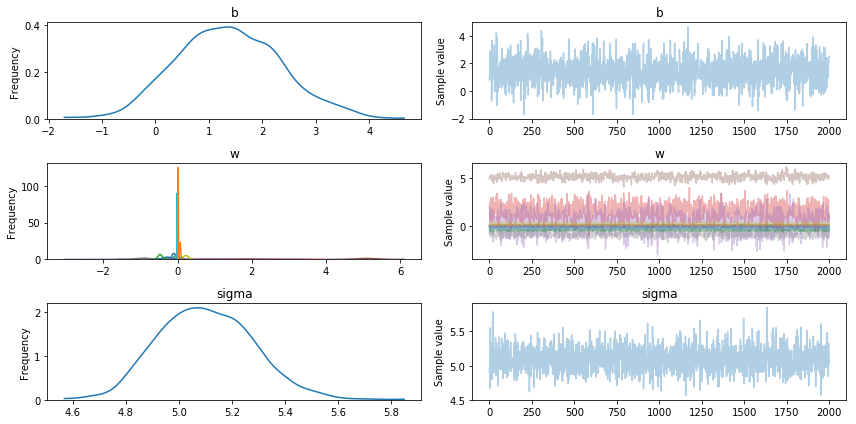

In [10]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace)
plt.tight_layout();

In [11]:
print mean_squared_error(trace.get_values('w').mean(axis=0), trace.get_values('b').mean(axis=0))

21.0412797627


In [12]:
with pm.Model() as laplace_model: 

    sigma = pm.Gamma('sigma', alpha=1, beta=1)
    b = pm.Laplace('b', mu=0, b=1)
    w = pm.Laplace('w', mu=0, b=1, shape=13)

    prediction = b + T.dot(X_train, w)
    likelihood = pm.Normal('y', mu=prediction, sd=sigma, observed=y_train)

In [13]:
with laplace_model:
    start = pm.find_MAP() 
    step = pm.NUTS(scaling=start) 
    trace = pm.sample(2000, step, start=start, progressbar=True)

100%|██████████| 2000/2000 [00:49<00:00, 40.81it/s]

         Current function value: 1248.982238
         Iterations: 59
         Function evaluations: 123
         Gradient evaluations: 119


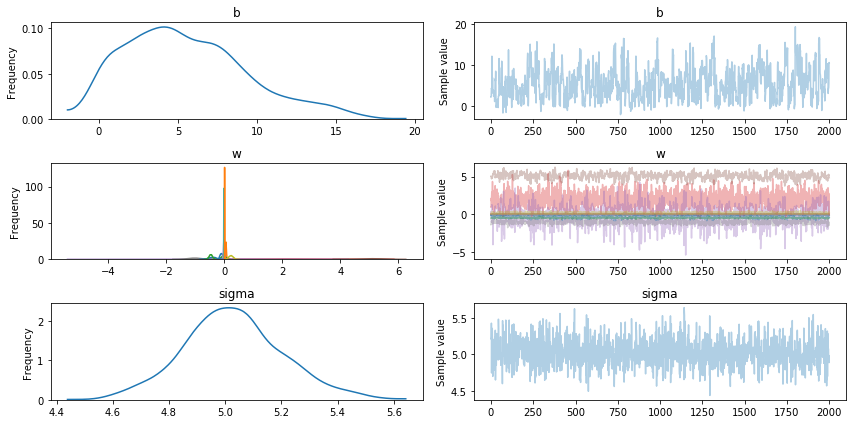

In [14]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace)
plt.tight_layout();

In [15]:
print mean_squared_error(trace.get_values('w').mean(axis=0), trace.get_values('b').mean(axis=0))

20.3873437374
